# Imports

In [192]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
from collections import Counter
from sklearn.cluster import KMeans
import seaborn
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Question 1

## d

In [95]:
def gen_cluster_point(center = [0, 0], cov=[[1, 0], [0, 1]]):
    x, y = np.random.multivariate_normal(center, cov, 1).T

    return np.array([[x[0],y[0]]])

In [96]:
list_of_centers = ['0_0', '10_10', '10_15']
center_map = {'0_0': [0,0], '10_10': [10,10], '10_15': [10,15]}
y_mapping = {'0_0': 0, '10_10': 1, '10_15': 2}
std_mapping = {'0_0': [[2, 1.5], [1.5, 2]], '10_10': [[2, -1.5], [-1.5, 2]], '10_15': [[2, 0], [0, 2]]}
choice_of_cluster = random.choices(list_of_centers, weights=(0.2, 0.3, 0.5), k=600)
array_X = np.array(gen_cluster_point(center = center_map[choice_of_cluster[0]], cov=std_mapping[choice_of_cluster[0]]))
array_y = np.array([y_mapping[choice_of_cluster[0]]])

for i in range(len(choice_of_cluster[1:])):
    array_X = np.concatenate([array_X, gen_cluster_point(center = center_map[choice_of_cluster[i]], cov=std_mapping[choice_of_cluster[i]])])
    array_y = np.concatenate([array_y, np.array([y_mapping[choice_of_cluster[i]]])])

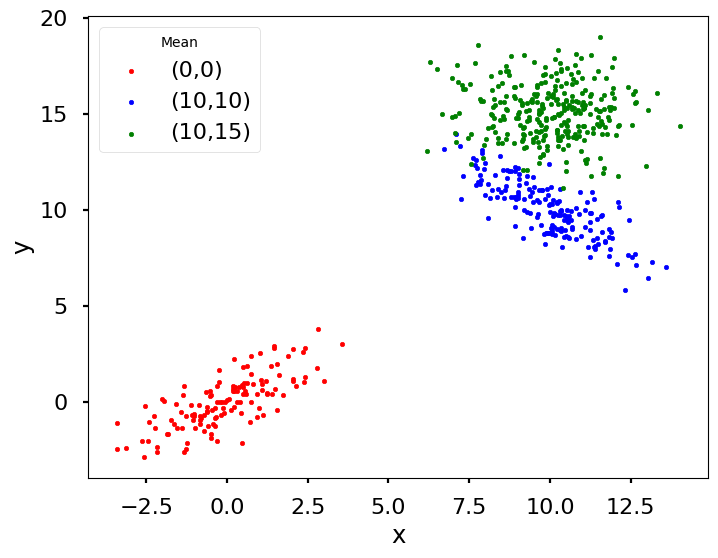

In [258]:
plt.figure(figsize=(8,6))
plt.scatter(array_X[array_y == 0, 0], array_X[array_y == 0, 1], color="red", s=10, label="(0,0)")
plt.scatter(array_X[array_y == 1, 0], array_X[array_y == 1, 1], color="blue", s=10, label="(10,10)")
plt.scatter(array_X[array_y == 2, 0], array_X[array_y == 2, 1], color="green", s=10, label="(10,15)")
plt.legend(title='Mean')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('question_1_d.png')
plt.show()

## e

In [111]:
# intialize Kmeans model and fit to the generated data
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(array_X)

In [116]:
# get the labels for the data points after performing the kmeans clustering
kmeans_labels = kmeans.labels_

In [114]:
# get estimated centres
estimated_centers = kmeans.cluster_centers_
estimated_centers

array([[10.13739721, 10.0954225 ],
       [-0.06301486,  0.04035481],
       [ 9.86446868, 15.22456261]])

In [117]:
# create varibales for plot
markers = ['o' if i == 0 else 's' if i == 1 else '*' for i in kmeans_labels]
colors = ['red' if i == 0 else 'blue' if i == 1 else 'green' for i in array_y]

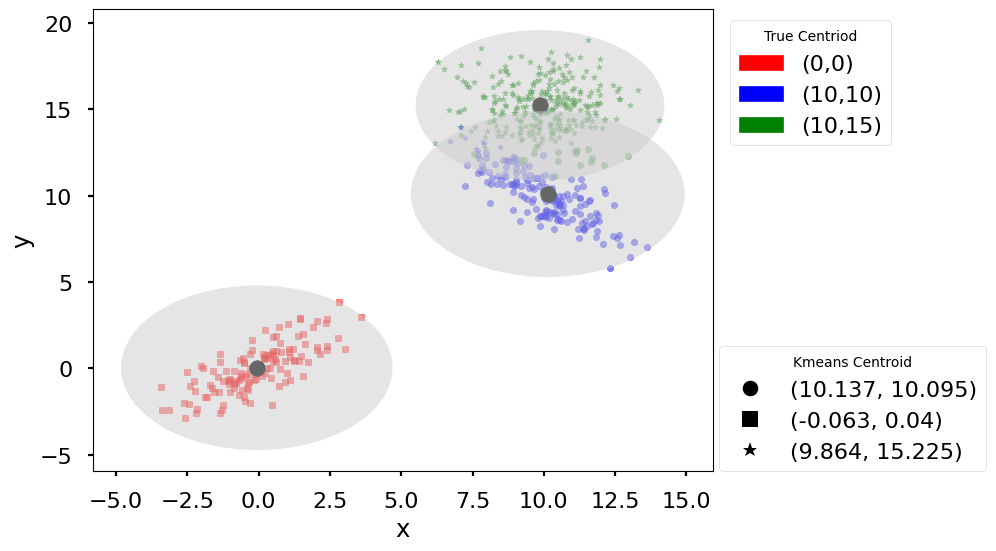

In [259]:
# create scatter plot
fig, ax = plt.subplots(figsize=(8,6))
for x, m, c in zip(array_X, markers, colors):
    ax.scatter(x[0], x[1], color = c, marker = m, alpha = 0.5, s=20)

for i in estimated_centers:
    ax.scatter(i[0], i[1], color='black')

# plot the representation of the KMeans model
centers = kmeans.cluster_centers_
radii = [cdist(array_X[kmeans_labels == i], [center]).max() for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

red = mpatches.Patch(color='red', label='(0,0)')
blue = mpatches.Patch(color='blue', label='(10,10)')
green = mpatches.Patch(color='green', label='(10,15)')
first_legend = plt.legend(handles=[red, blue, green], bbox_to_anchor=(1.01, 1), title="True Centriod")
ax = plt.gca().add_artist(first_legend)

circle = mlines.Line2D([], [], color='black', ls='', marker='o', label=str((round(estimated_centers[0][0], 3), round(estimated_centers[0][1], 3))))
square = mlines.Line2D([], [], color='black', ls='', marker='s', label=str((round(estimated_centers[1][0], 3), round(estimated_centers[1][1], 3))))
x = mlines.Line2D([], [], color='black', ls='', marker='*', label=str((round(estimated_centers[2][0], 3), round(estimated_centers[2][1], 3))))
plt.legend(handles=[circle, square, x], loc=(1.01, 0), title='Kmeans Centroid')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('question_1_e.png', bbox_inches='tight')
plt.show()

## f

In [121]:
kmeans.predict([[8.3,15.5]])

array([2])

## g

In [128]:
# Mean within cluster sum of sqaures function
def wcc(model, X):
    means = model.cluster_centers_
    labels = model.predict(X)
    WCSS = 0
    for i in range(len(means)):
        mean = means[i]
        points = X[labels == i]
        dist = 0
        for p in points:
            dist += np.sqrt(((mean[0]-p[0])**2) + ((mean[1] - p[1])**2))
        WCSS += dist/len(points)

    return WCSS/len(means)

In [131]:
mean_wcss = wcc(kmeans, array_X)
mean_wcss

1.6985608952073783

In [133]:
total_wcss = mean_wcss*3
total_wcss

5.095682685622135

# h

In [135]:
# Fit GMM on the generated data
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(array_X)

GaussianMixture(n_components=3, random_state=42)

In [136]:
# get estimated parameters
gmm_weights = gmm.weights_
gmm_means = gmm.means_
gmm_cov_matrices = gmm.covariances_

In [137]:
# weights
gmm_weights

array([0.29328071, 0.21833333, 0.48838596])

In [138]:
# means
gmm_means

array([[ 9.95494737, 10.05950428],
       [-0.06301486,  0.04035481],
       [ 9.98151224, 15.10554948]])

In [139]:
# covariance matrices
gmm_cov_matrices

array([[[ 1.93476102, -1.67025209],
        [-1.67025209,  2.25374477]],

       [[ 1.98946588,  1.44635839],
        [ 1.44635839,  1.86447603]],

       [[ 1.89571062, -0.10974744],
        [-0.10974744,  2.13783655]]])

In [140]:
# cluster data
gmm_labels = gmm.predict(array_X)

In [141]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

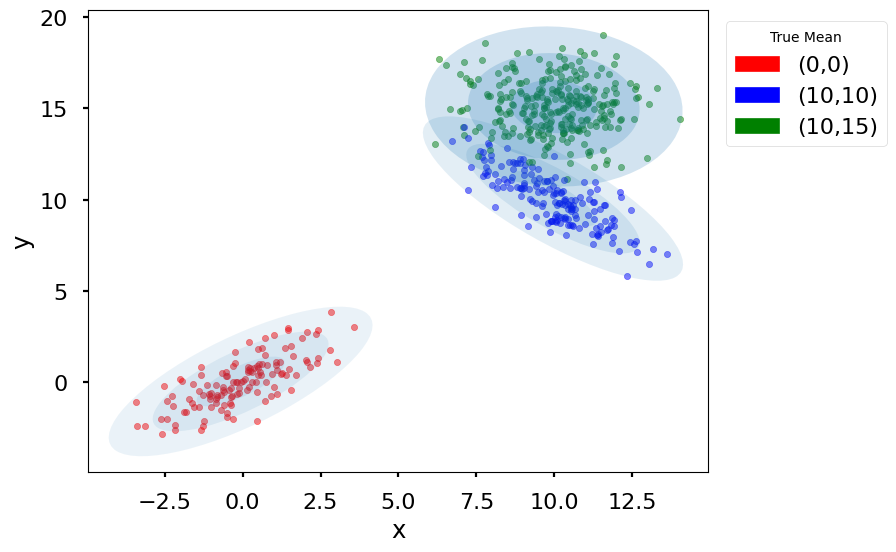

In [260]:
# visualise the model with ellipsoids
fig, ax = plt.subplots(figsize=(8,6))    
for x, c in zip(array_X, colors):
    ax.scatter(x[0], x[1], color=c, alpha=0.5, s=20)

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

red = mpatches.Patch(color='red', label='(0,0)')
blue = mpatches.Patch(color='blue', label='(10,10)')
green = mpatches.Patch(color='green', label='(10,15)')
plt.legend(handles=[red, blue, green], bbox_to_anchor=(1.01, 1), title="True Mean")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('question_1_h.png', bbox_inches='tight')
plt.show()

In [143]:
# get responsibility values
responsibility_values = gmm.predict_proba(array_X)

In [144]:
# custom markers
markers_gmm = ['o' if i == 0 else 's' if i == 1 else '*' for i in gmm_labels]

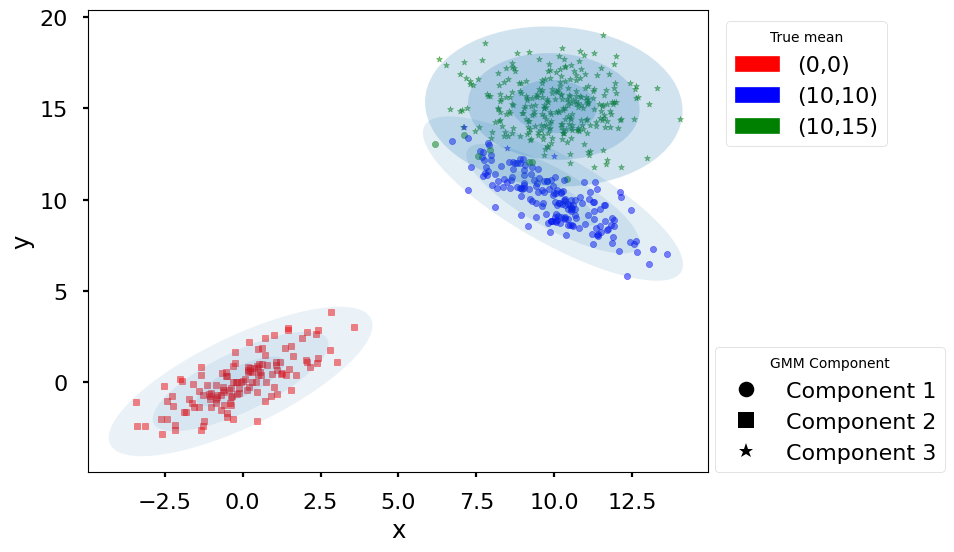

In [262]:
# create scatter plot
fig, ax = plt.subplots(figsize=(8,6))    
for x, m, c in zip(array_X, markers_gmm, colors):
    ax.scatter(x[0], x[1], color = c, marker = m, alpha = 0.5, s=20)

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

red = mpatches.Patch(color='red', label='(0,0)')
blue = mpatches.Patch(color='blue', label='(10,10)')
green = mpatches.Patch(color='green', label='(10,15)')
first_legend = plt.legend(handles=[red, blue, green], bbox_to_anchor=(1.01, 1), title="True mean")
ax = plt.gca().add_artist(first_legend)

circle = mlines.Line2D([], [], color='black', ls='', marker='o', label='Component 1')
square = mlines.Line2D([], [], color='black', ls='', marker='s', label='Component 2')
x = mlines.Line2D([], [], color='black', ls='', marker='*', label='Component 3')
plt.legend(handles=[circle, square, x], loc=(1.01, 0), title='GMM Component')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('question_1_j.png', bbox_inches='tight')
plt.show()

# i

In [149]:
# get priors for (8.3, 15.5)
x = np.array((8.3, 15.5)).reshape(1, -1)
priors = gmm.predict_proba(x)
priors

array([[5.06117986e-05, 1.11857628e-31, 9.99949388e-01]])

In [150]:
gmm.predict(x)

array([2], dtype=int64)

# j

In [153]:
# Mean within cluster sum of sqaures function
def wcc(model, X):
    means = model.means_
    labels = model.predict(X)
    WCSS = 0
    for i in range(len(means)):
        mean = means[i]
        points = X[labels == i]
        dist = 0
        for p in points:
            dist += np.sqrt(((mean[0]-p[0])**2) + ((mean[1] - p[1])**2))
        WCSS += dist/len(points)

    return WCSS/len(means)

In [155]:
# WCSS
wcc_score_mean = wcc(gmm, array_X)
wcc_score_mean

1.7191920579280693

In [156]:
wcc_score_total = wcc_score_mean*3
wcc_score_total

5.157576173784208

In [165]:
dist_1 = np.linalg.norm(gmm_means[0] - gmm_means[1])
dist_2 = np.linalg.norm(gmm_means[0] - gmm_means[2])
dist_3 = np.linalg.norm(gmm_means[2] - gmm_means[1])
print(dist_1)
print(dist_2)
print(dist_3)

14.16837758135969
5.046115118993035
18.106700829730514


In [166]:
bcss = dist_1 + dist_2 + dist_3
bcss

37.321193530083235

In [168]:
bcss_mean = bcss/3
bcss_mean

12.440397843361078

# Question 2

## a

In [ ]:
# import the csv to a pandas dataframe
exam_data = pd.read_csv('q22024.csv')

In [172]:
exam_data

,x,y
0,72.876835,0
1,222.648976,0
2,217.689533,0
3,134.182503,0
4,88.420267,1
...,...,...
495,151.787390,0
496,162.920591,0
497,211.627680,1
498,90.616661,0


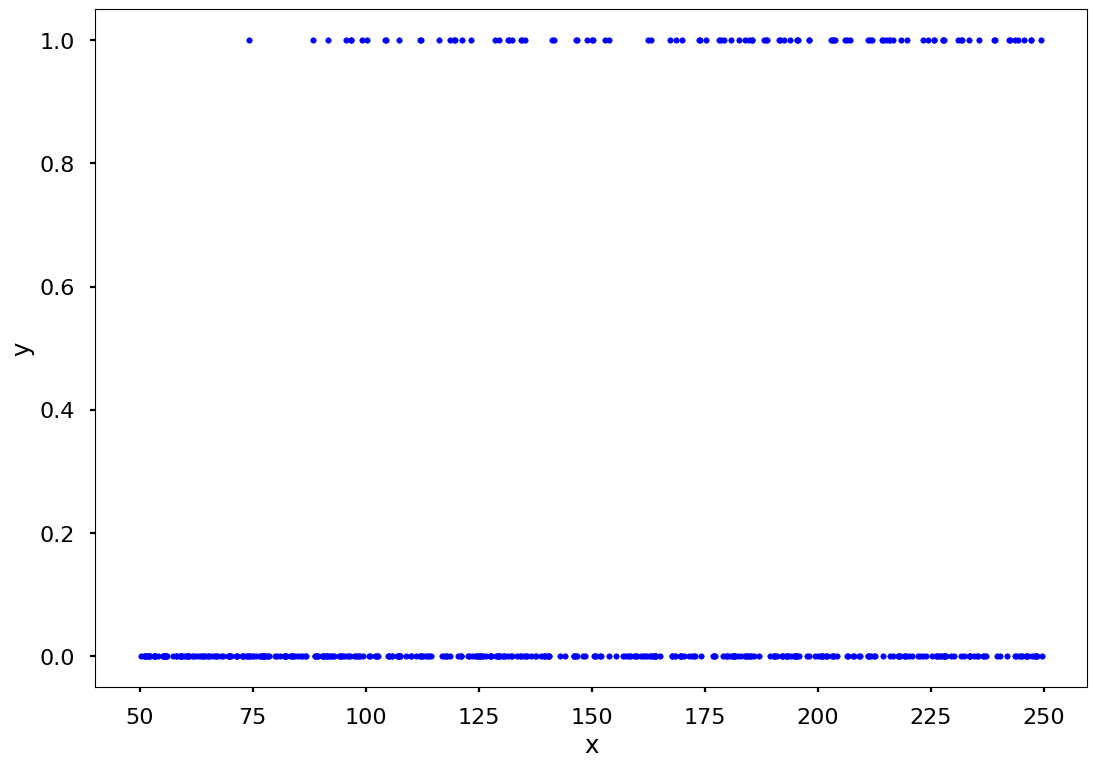

In [263]:
plt.scatter(exam_data['x'], exam_data['y'], c ="blue", s=15)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('question_2_a.png', bbox_inches='tight')
plt.show()

## b

### i

In [188]:
# set variables
x = np.array(exam_data['x']).reshape(-1, 1)
y = exam_data['y']

In [193]:
# Fit the Logistic Regression model and obtain model values
logit_model = sm.Logit(y, sm.add_constant(x)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.476652
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                 0.07258
Time:                        12:56:00   Log-Likelihood:                -238.33
converged:                       True   LL-Null:                       -256.98
Covariance Type:            nonrobust   LLR p-value:                 1.010e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2430      0.374     -8.674      0.000      -3.976      -2.510
x1             0.0121      0.

### ii

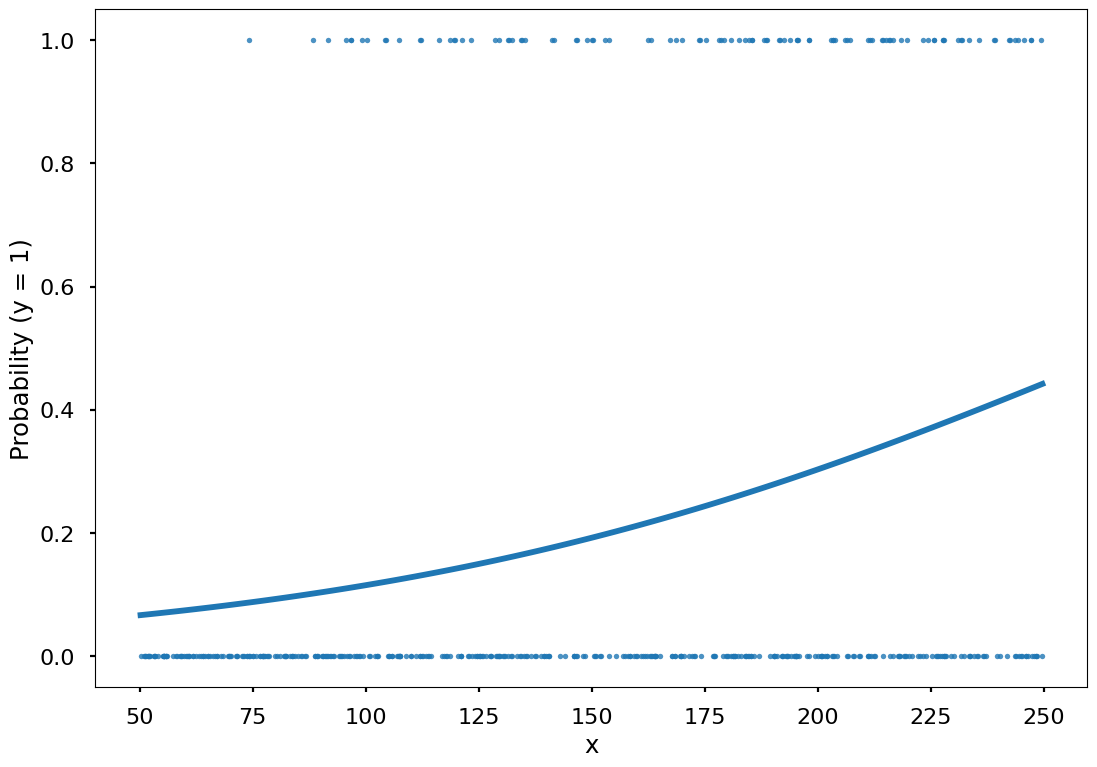

In [264]:
ax = seaborn.regplot(x='x', y='y', data=exam_data, logistic=True, ci=None, scatter_kws={'s':15})
ax.set(xlabel='x', ylabel='Probability (y = 1)')
plt.savefig('question_2_b.png', bbox_inches='tight')
plt.show()